In [1]:
# Uninstall dulu versi lama supaya bersih
%pip uninstall -y mediapipe protobuf numpy

Found existing installation: mediapipe 0.10.8
Uninstalling mediapipe-0.10.8:
  Successfully uninstalled mediapipe-0.10.8
Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install versi yang kompatibel di Colab
%pip install mediapipe==0.10.8 protobuf==3.20.3 numpy==1.26.4

  Using cached mediapipe-0.10.8-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl.metadata (698 bytes)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached mediapipe-0.10.8-cp310-cp310-win_amd64.whl (50.5 MB)
Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)

   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
   ------------- -------------------------- 1/3 [numpy]
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
%pip install scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install tensorflow.keras.models

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


## Pose Estimation dari Video Real-Time (MediaPipe/OpenPose)

In [11]:
import cv2
import mediapipe as mp
import numpy as np

import os
DATA_PATH = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def extract_keypoints_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    keypoints_seq = []

    if not cap.isOpened():
        print(f"[ERROR] Tidak bisa membuka video: {video_path}")
        return []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            keypoints = []
            for lm in results.pose_landmarks.landmark:
                keypoints.extend([lm.x, lm.y, lm.z])
            keypoints_seq.append(keypoints)

    cap.release()
    return keypoints_seq


## Ekstraksi Keypoints dari Sequence Video

In [12]:
import os
import numpy as np

# Fungsi ekstrak keypoints dari video (pastikan sudah ada)
def extract_keypoints_from_video(video_path):
    import cv2
    import mediapipe as mp
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    cap = cv2.VideoCapture(video_path)
    keypoints_seq = []

    if not cap.isOpened():
        print(f"[ERROR] Tidak bisa membuka video: {video_path}")
        return []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            keypoints = []
            for lm in results.pose_landmarks.landmark:
                keypoints.extend([lm.x, lm.y, lm.z])
            keypoints_seq.append(keypoints)

    cap.release()
    return keypoints_seq


# Lokasi dataset video (gunakan raw string agar tidak error)
DATA_PATH = r"D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"
sequence_length = 30
dataset = []
total_sequences = 0

# Ambil kelas berdasarkan folder
classes = sorted([d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))])
print("📂 Kelas ditemukan:", classes)

for label in classes:
    label_path = os.path.join(DATA_PATH, label)
    print(f"\n🚀 Proses kelas: {label}")
    video_files = [f for f in os.listdir(label_path) if f.lower().endswith('.mp4')]

    if not video_files:
        print(f"⚠️ Tidak ada file .mp4 dalam {label}")
        continue

    for file in video_files:
        print(f"  📄 Memproses: {file}")
        video_path = os.path.join(label_path, file)
        keypoints = extract_keypoints_from_video(video_path)

        if len(keypoints) >= sequence_length:
            # Buat sequence per 30 frame
            for i in range(0, len(keypoints) - sequence_length + 1, sequence_length):
                sequence = keypoints[i:i+sequence_length]
                dataset.append({
                    "keypoints": sequence,
                    "label": label
                })
                total_sequences += 1
        else:
            print(f"  ⚠️ [SKIP] {file} terlalu pendek ({len(keypoints)} frame)")

# Simpan dataset ke .npz (bukan .csv)
save_path = r"D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\db_mp.npz"
np.savez(save_path, data=dataset)
print(f"\n✅ Dataset berhasil disimpan: {save_path}")
print(f"🧮 Total sequence: {total_sequences}")
print(f"🏷️ Kelas unik: {set([item['label'] for item in dataset])}")


📂 Kelas ditemukan: ['Ankle Circles', 'Arm Circles', 'Breathing Exercise', 'Calf Raises', 'Forward Bend', 'Hip Circles', 'Jumping Jacks', 'Knee Lifts', 'Lunges', 'Neck Stretch', 'Shoulder Rolls', 'Side Stretch', 'Squats', 'Torso Twist', 'Wrist Stretch']

🚀 Proses kelas: Ankle Circles
  📄 Memproses: ankle circles 1.mp4

🚀 Proses kelas: Arm Circles
  📄 Memproses: arm circles 1.mp4
  📄 Memproses: arm circles 2.mp4

🚀 Proses kelas: Breathing Exercise
  📄 Memproses: breathing exercise 1.mp4
  📄 Memproses: breathing exercise 2.mp4
  📄 Memproses: breathing exercise 3.mp4

🚀 Proses kelas: Calf Raises
  📄 Memproses: calf raises 1.mp4
  📄 Memproses: calf raises 2.mp4

🚀 Proses kelas: Forward Bend
  📄 Memproses: forward bend 1.mp4
  📄 Memproses: forward bend 2.mp4

🚀 Proses kelas: Hip Circles
  📄 Memproses: hip circles 1.mp4
  📄 Memproses: Hip_circles.mp4

🚀 Proses kelas: Jumping Jacks
  📄 Memproses: jumping jacks 1.mp4
  📄 Memproses: jumping jacks 2.mp4

🚀 Proses kelas: Knee Lifts
  📄 Memproses: 

## Data Preprocessing & Training untuk CNN-LSTM


d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2033 - loss: 2.4203 - val_accuracy: 0.4558 - val_loss: 1.9431
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5417 - loss: 1.7599 - val_accuracy: 0.6961 - val_loss: 1.1675
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7021 - loss: 1.0135 - val_accuracy: 0.7928 - val_loss: 0.7477
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7806 - loss: 0.7074 - val_accuracy: 0.6851 - val_loss: 1.1536
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7370 - loss: 1.0143 - val_accuracy: 0.7182 - val_loss: 1.0398
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7333 - loss: 0.8136 - val_accuracy: 0.8315 - val_loss: 0.6382
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8365 - loss: 0.5434 - val_accuracy: 0.7790 - val_loss: 0.7214
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8094 - loss: 0.5910 - val_accuracy: 0.8122 - v

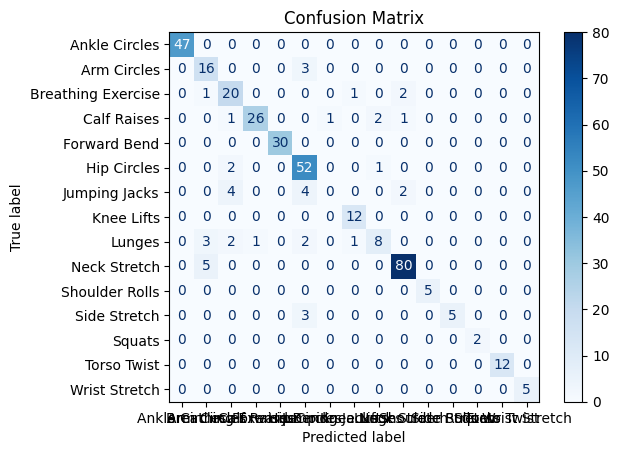

✅ Model disimpan ke model_lstm.h5


In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. Load dataset
data = np.load(r"D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\db_mp.npz", allow_pickle=True)
dataset = data['data']

# 2. Ekstrak keypoints dan labels
X = np.array([item['keypoints'] for item in dataset])
y_labels = [item['label'] for item in dataset]

# 3. Encode label
le = LabelEncoder()
y = le.fit_transform(y_labels)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Bangun model LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.LSTM(64, return_sequences=False, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Latih model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# 7. Evaluasi model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Akurasi
acc = accuracy_score(y_test, y_pred_classes)
print(f"\n🎯 Akurasi: {acc*100:.2f}%")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Simpan model
model.save(r"D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5")
print("✅ Model disimpan ke model_lstm.h5")


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(99,)),   # contoh input shape
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# model sudah siap, kamu bisa latih atau langsung convert


In [15]:
model = tf.keras.models.load_model('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False
converter.experimental_enable_resource_variables = True

tflite_model = converter.convert()

save_path = 'D:\\Semester 6\\PEMROGRAMAN SISTEM CERDAS 2\\capstone_mp_model\\apk_model.tflite'
with open(save_path, 'wb') as f:
    f.write(tflite_model)

print(f"✅ Model berhasil dikonversi dan disimpan ke: {save_path}")


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpo2shi3ht\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpo2shi3ht\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpo2shi3ht'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 99), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2494239834176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494506238192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239843680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239847376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239920320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239922432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239924720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239925424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239931584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2494239924544: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berh

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import os
from tkinter import Tk, filedialog
import shutil

# ✅ Load model terlatih dari lokal
model_path = 'D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5'
model = load_model(model_path)

# ✅ Daftar kelas
CLASSES = [
    "Neck Stretch", "Shoulder Rolls", "Arm Circles", "Side Stretch", "Torso Twist",
    "Hip Circles", "Forward Bend", "Knee Lifts", "Lunges", "Squats",
    "Calf Raises", "Jumping Jacks", "Ankle Circles", "Wrist Stretch", "Breathing Exercise"
]
sequence_length = 30

# ✅ Pilih file video lewat dialog
print("\n⬆️ Silakan pilih video untuk prediksi:")
Tk().withdraw()  # Menyembunyikan window tkinter utama
video_path = filedialog.askopenfilename(
    title="Pilih Video Latihan",
    filetypes=[("MP4 files", "*.mp4"), ("All files", "*.*")]
)

if not video_path:
    print("❌ Tidak ada file dipilih.")
    exit()

print(f"\n📁 Video terpilih: {video_path}")

# Dummy extractor (GANTI dengan fungsi ekstraksi pose asli menggunakan MediaPipe)
def extract_keypoints_from_video(path):
    # Simulasi output: 30 frame, masing-masing 33 keypoints × 3 (x,y,z) = 99 dimensi
    return [[0]*99 for _ in range(30)]  # <-- Ganti dengan hasil ekstraksi asli

# ✅ Ekstraksi keypoints
keypoints = extract_keypoints_from_video(video_path)

# ✅ Proses prediksi
if len(keypoints) >= sequence_length:
    sequence = np.array(keypoints[:sequence_length]).reshape(1, sequence_length, 99)

    prediction = model.predict(sequence)[0]
    pred_index = np.argmax(prediction)
    pred_label = CLASSES[pred_index]
    confidence = prediction[pred_index]

    print(f"\n🎬 Video: {os.path.basename(video_path)}")
    print(f"🔍 Prediksi kelas: {pred_label}")
    print(f"📊 Keyakinan: {confidence * 100:.2f}%")
    print("📈 Probabilitas per kelas:")
    for i, cls in enumerate(CLASSES):
        print(f"  {cls:<25}: {prediction[i]*100:.2f}%")

else:
    print(f"❌ Video terlalu pendek (hanya {len(keypoints)} frame). Harus minimal {sequence_length} frame.")



⬆️ Silakan pilih video untuk prediksi:


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

print("✅ TensorFlow Keras import sukses!")


✅ TensorFlow Keras import sukses!


In [ ]:
import os
import numpy as np
import shutil
from tensorflow.keras.models import load_model
from tkinter import Tk, filedialog

# Load model
model = load_model('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5', compile=False)

# Daftar kelas sesuai deskripsi
CLASSES = [
    "Neck Stretch", "Shoulder Rolls", "Arm Circles", "Side Stretch", "Torso Twist",
    "Hip Circles", "Forward Bend", "Knee Lifts", "Lunges", "Squats",
    "Calf Raises", "Jumping Jacks", "Ankle Circles", "Wrist Stretch", "Breathing Exercise"
]

sequence_length = 30

# Dialog pilih file
Tk().withdraw()  # Sembunyikan window utama
video_path = filedialog.askopenfilename(title="Pilih video gerakan", filetypes=[("MP4 files", "*.mp4"), ("All files", "*.*")])
if not video_path:
    print("❌ Tidak ada file yang dipilih.")
    exit()

print(f"\n⬆️ File terpilih: {video_path}")

# Dummy: Fungsi ekstraksi keypoints (GANTI dengan fungsi aslimu)
def extract_keypoints_from_video(path):
    # Harus dikembalikan sebagai: list of 30 list keypoints, tiap frame = 33 x 3
    return [[0]*99 for _ in range(30)]  # simulasi dummy data

# Ekstrak keypoints
keypoints = extract_keypoints_from_video(video_path)

if len(keypoints) >= sequence_length:
    sequence = np.array(keypoints[:sequence_length]).reshape(1, sequence_length, 99)

    prediction = model.predict(sequence)[0]
    pred_index = np.argmax(prediction)
    pred_label = CLASSES[pred_index]
    confidence = prediction[pred_index]

    print(f"\n📁 Video: {os.path.basename(video_path)}")
    print(f"🔎 Prediksi kelas: {pred_label}")
    print(f"📊 Keyakinan: {confidence * 100:.2f}%")
    print("📈 Probabilitas per kelas:")
    for i, cls in enumerate(CLASSES):
        print(f"  {cls:<20}: {prediction[i]*100:.2f}%")
else:
    print(f"❌ Video terlalu pendek (hanya {len(keypoints)} frame). Minimal {sequence_length} frame.")


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pickle
from collections import deque

# Load model dan Label Encoder
model = load_model("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5")
with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Setup MediaPipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Buffer & Konstanta
SEQUENCE_LENGTH = 30
BUFFER = deque(maxlen=SEQUENCE_LENGTH)

# Kamera
cap = cv2.VideoCapture(0)
print("🔄 Menyalakan kamera...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("❌ Gagal membaca kamera.")
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    if results.pose_landmarks:
        keypoints = []
        for lm in results.pose_landmarks.landmark:
            keypoints.extend([lm.x, lm.y, lm.z])
        BUFFER.append(keypoints)

        if len(BUFFER) == SEQUENCE_LENGTH:
            sequence = np.array(BUFFER).reshape(1, SEQUENCE_LENGTH, -1)
            prediction = model.predict(sequence, verbose=0)[0]
            pred_index = np.argmax(prediction)
            label = label_encoder.classes_[pred_index]
            confidence = prediction[pred_index]

            cv2.putText(frame, f"{label} ({confidence*100:.2f}%)",
                        (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (0, 255, 0), 2, cv2.LINE_AA)

        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    cv2.imshow("Pose Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf

# 1. Load model LSTM yang sudah kamu latih
model_path = 'D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5'
model = tf.keras.models.load_model(model_path)

# 2. Siapkan converter TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Atur agar mendukung ops TensorFlow (LSTM dan lainnya)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 4. Nonaktifkan tensor list lowering
converter._experimental_lower_tensor_list_ops = False

# 5. Aktifkan dukungan resource variables (untuk LSTM internal states)
converter.experimental_enable_resource_variables = True

# 6. Konversi ke TFLite
tflite_model = converter.convert()

# 7. Simpan hasil model TFLite ke file
tflite_path = 'D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.tflite'
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"✅ Model berhasil dikonversi dan disimpan: {tflite_path}")


In [ ]:
import tensorflow as tf

# 1. Load ulang model
model = tf.keras.models.load_model('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.h5')

# 2. Kompilasi ulang agar tensor-nya fix
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Jalankan sekali dummy input agar bentuk input/output terkunci
import numpy as np
dummy_input = np.random.rand(1, 30, 99).astype(np.float32)
_ = model.predict(dummy_input)

# 4. Konversi ke TFLite (dengan setting tambahan jika LSTM error)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# 5. Simpan model
with open('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.tflite', 'wb') as f:
    f.write(tflite_model)

print("Konversi berhasil. Model TFLite aman digunakan.")


In [ ]:
# Load dan tes TFLite
interpreter = tf.lite.Interpreter(model_path='D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.tflite')
interpreter.allocate_tensors()

output_details = interpreter.get_output_details()
print("Output shape:", output_details[0]['shape'])  # Harus (1, 5)


In [ ]:
print(le.classes_)  # Harus berisi 5 kelas lengkap
print(f"Jumlah kelas: {len(le.classes_)}")


In [ ]:
labels_in_dataset = set([item['label'] for item in dataset])
print("Kelas unik di dataset:", labels_in_dataset)


In [ ]:
import tensorflow as tf
import numpy as np

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.tflite")
interpreter.allocate_tensors()

# Ambil detail input/output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

# Daftar kelas (sesuaikan dengan dataset asli kamu)
CLASSES = [
    "Neck Stretch", "Shoulder Rolls", "Arm Circles", "Side Stretch", "Torso Twist",
    "Hip Circles", "Forward Bend", "Knee Lifts", "Lunges", "Squats",
    "Calf Raises", "Jumping Jacks", "Ankle Circles", "Wrist Stretch", "Breathing Exercise"
]

# Buat contoh input (gunakan data asli saat inferensi)
sequence = np.random.rand(1, 30, 99).astype(np.float32)

# Masukkan input ke interpreter
interpreter.set_tensor(input_details[0]['index'], sequence)
interpreter.invoke()

# Ambil hasil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])

print("Output shape:", output_data.shape)  # Harus (1,5)

# Ambil indeks kelas dengan probabilitas tertinggi
predicted_index = np.argmax(output_data)
confidence = output_data[0][predicted_index]

print(f" Confidence: {confidence * 100:.2f}%")


In [ ]:
import tensorflow as tf
import numpy as np

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path= "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model_lstm.tflite")
interpreter.allocate_tensors()

# Ambil detail input/output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("📥 Input details:", input_details)
print("📤 Output details:", output_details)

# Daftar kelas gerakan lengkap (15 kelas)
CLASSES = [
    "Neck Stretch", "Shoulder Rolls", "Arm Circles", "Side Stretch", "Torso Twist",
    "Hip Circles", "Forward Bend", "Knee Lifts", "Lunges", "Squats",
    "Calf Raises", "Jumping Jacks", "Ankle Circles", "Wrist Stretch", "Breathing Exercise"
]

# Contoh input dummy (untuk uji coba, ganti dengan data asli saat inferensi)
sequence = np.random.rand(1, 30, 99).astype(np.float32)  # shape harus sesuai input model

# Masukkan input ke interpreter
interpreter.set_tensor(input_details[0]['index'], sequence)
interpreter.invoke()

# Ambil hasil output prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])  # shape: (1, 15)
print("📊 Output shape:", output_data.shape)

# Kelas dengan probabilitas tertinggi
predicted_index = np.argmax(output_data)
confidence = output_data[0][predicted_index]
predicted_label = CLASSES[predicted_index]

print(f"\n🔎 Prediksi gerakan: {predicted_label}")
print(f"✅ Confidence: {confidence * 100:.2f}%")

# Tampilkan semua probabilitas
print("\n📈 Probabilitas per kelas:")
for i, cls in enumerate(CLASSES):
    print(f"  {cls:<20}: {output_data[0][i] * 100:.2f}%")


In [ ]:
import numpy as np

# Load data .npz
data = np.load('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\db_mp.npz', allow_pickle=True)

X = []
y = []

# Buat label map: nama kelas → angka
label_map = {name: idx for idx, name in enumerate(data.files)}

print("Label map:", label_map)

# Loop semua kelas
for class_name in data.files:
    class_data = data[class_name]

    # Pastikan datanya array (atau list of array)
    if isinstance(class_data, np.ndarray):
        for sample in class_data:
            X.append(sample)
            y.append(label_map[class_name])
    else:
        print(f"Warning: data untuk {class_name} tidak dikenali sebagai array.")

# Konversi jadi array numpy
X = np.array(X)
y = np.array(y)

print("Jumlah total sample:", len(X))
print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
import numpy as np

data = np.load('D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\db_mp.npz', allow_pickle=True)

# Tampilkan semua key (biasanya nama kelas)
print("Nama-nama kelas dalam file:")
print(data.files)


In [ ]:
for name in data.files:
    print(f"--- Kelas: {name} ---")
    array = data[name]

    for i, sample in enumerate(array):
        print(f"Sample {i}: {sample}")

    print("=" * 50)
